# Problem 4

In [117]:
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot  as plt

In [85]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

In [86]:
gb_clf = GradientBoostingClassifier(n_estimators=1500,  # T = 1500
                                     learning_rate=0.1,  # 0.1 and 0.01
                                     max_leaf_nodes=4,
                                     min_samples_split=5,
                                     subsample=0.5,     # 0.5 and 1 
                                     random_state=42)


gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_leaf_nodes=4, min_samples_split=5,
                           n_estimators=1500, random_state=42, subsample=0.5)

In [88]:
y_pred_proba_stages = gb_clf.staged_predict_proba(X_test)

In [ ]:
deviances = []
for y_pred_proba in y_pred_proba_stages:
    deviance = log_loss(y_test, y_pred_proba)
    deviances.append(deviance)

Text(0, 0.5, 'Log Loss')

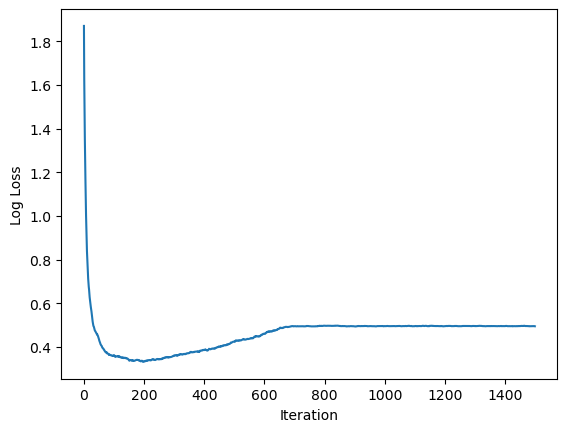

In [93]:
plt.plot(deviances)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

In [ ]:
deviance_dct = {
    (0.1,0.5): None,
    (0.1, 1) : None,
    (0.01, 0.5): None,
    (0.01, 1): None
}

for lr in [0.1, 0.01]:
    for p in [0.5, 1]:
        gb_clf = GradientBoostingClassifier(n_estimators=1500, # T = 1500
                                            learning_rate=lr, # 0.1 and 0.01
                                            max_leaf_nodes=4,
                                            min_samples_split=5,
                                            subsample=p, # 0.5 and 1 
                                            random_state=42)


        gb_clf.fit(X_train, y_train)

        y_pred_proba_stages = gb_clf.staged_predict_proba(X_test)

        deviances = []
        for y_pred_proba in y_pred_proba_stages:
            deviance = log_loss(y_test, y_pred_proba)
            deviances.append(deviance)

        deviance_dct[(lr, p)] = deviances

Text(0, 0.5, 'Log Loss')

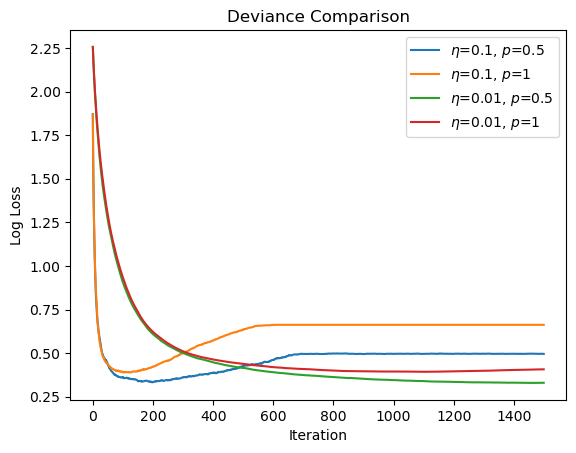

In [101]:
for lr in [0.1, 0.01]:
    for p in [0.5, 1]:

        plt.plot(deviance_dct[(lr,p)], label=f'$\eta$={lr}, $p$={p}')

plt.title('Deviance Comparison')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

In [103]:
param_grid = {
    'n_estimators': [20, 30, 40, 60, 80, 100, 200, 500]
}

gb_clf = GradientBoostingClassifier(learning_rate=0.1,  # Example learning rate 
                                     max_leaf_nodes=4,
                                     min_samples_split=5,
                                     subsample=0.5,     # Example subsample
                                     random_state=42)

grid_search = GridSearchCV(estimator=gb_clf, 
                           param_grid=param_grid, 
                           cv=10,
                           scoring='neg_log_loss',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

In [108]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.113934,0.024499,0.006466,0.004081,20,{'n_estimators': 20},-0.634718,-0.410750,-0.357796,-0.463038,-0.542924,-0.585417,-0.483604,-0.511252,-0.511213,-0.462232,-0.496294,0.076584,8
1,1.633280,0.044832,0.003623,0.000530,30,{'n_estimators': 30},-0.517642,-0.306412,-0.261578,-0.343196,-0.406640,-0.407291,-0.317340,-0.397742,-0.420775,-0.341912,-0.372053,0.069221,7
2,2.151802,0.046762,0.003758,0.000719,40,{'n_estimators': 40},-0.462130,-0.256677,-0.211052,-0.306566,-0.337621,-0.341101,-0.251725,-0.328141,-0.387675,-0.290532,-0.317322,0.068645,6
3,3.099959,0.082132,0.004153,0.000775,60,{'n_estimators': 60},-0.414317,-0.200579,-0.160666,-0.253328,-0.285509,-0.274873,-0.167223,-0.262561,-0.316265,-0.212774,-0.254810,0.072020,5
4,4.124060,0.086896,0.004514,0.000750,80,{'n_estimators': 80},-0.384714,-0.179854,-0.145694,-0.217918,-0.251432,-0.235531,-0.128219,-0.246509,-0.282631,-0.179247,-0.225175,0.070668,4
5,5.278415,0.084862,0.005714,0.002679,100,{'n_estimators': 100},-0.352984,-0.166531,-0.121922,-0.189873,-0.226205,-0.204619,-0.102296,-0.232413,-0.245616,-0.159207,-0.200167,0.067655,3
6,10.710508,0.210531,0.006764,0.000723,200,{'n_estimators': 200},-0.326890,-0.137073,-0.098897,-0.120130,-0.223812,-0.159400,-0.048569,-0.227744,-0.165468,-0.117145,-0.162513,0.075221,1
7,21.778956,0.112896,0.009756,0.000930,500,{'n_estimators': 500},-0.484325,-0.171181,-0.106960,-0.103007,-0.292377,-0.157914,-0.016387,-0.301402,-0.141732,-0.160283,-0.193557,0.125934,2


In [104]:
best_n_estimators

200

Text(0, 0.5, 'Log Loss')

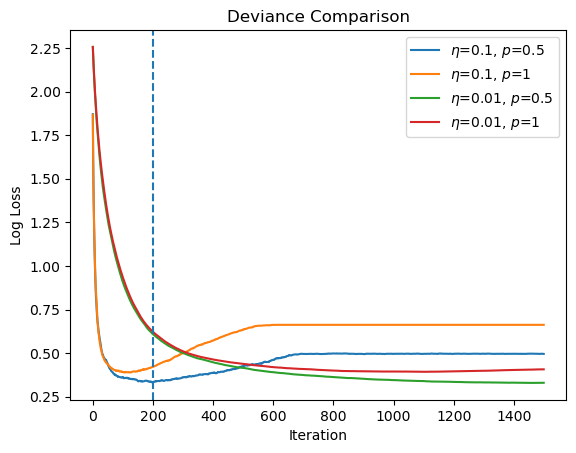

In [115]:
for lr in [0.1, 0.01]:
    for p in [0.5, 1]:

        plt.plot(deviance_dct[(lr,p)], label=f'$\eta$={lr}, $p$={p}')

plt.axvline(best_n_estimators, linestyle='--')

plt.title('Deviance Comparison')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log Loss')

In [116]:
gb_clf = GradientBoostingClassifier(n_estimators=3000,  # T = 1500
                                     learning_rate=0.1,  # 0.1 and 0.01
                                     max_leaf_nodes=4,
                                     min_samples_split=5,
                                     subsample=1,     # 0.5 and 1 
                                     random_state=42)


gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_leaf_nodes=4, min_samples_split=5,
                           n_estimators=3000, random_state=42, subsample=1)

In [124]:
errors = []
for y_pred in gb_clf.staged_predict(X_test):
    errors.append(
        1 - accuracy_score(y_pred, y_test)
    )

Text(0.5, 1.0, 'Misclassification Error with 3000 Iterations')

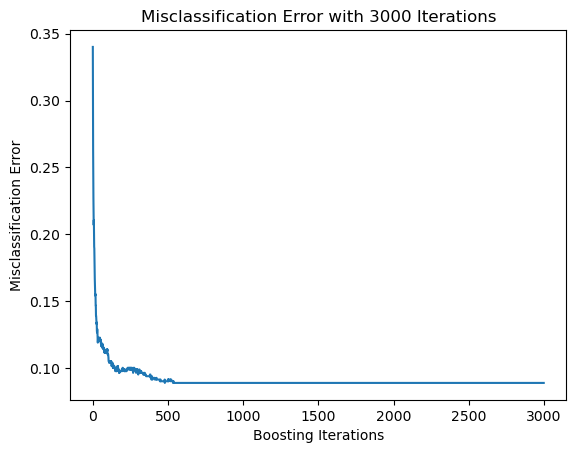

In [132]:
plt.plot(errors)
# plt.yscale('log')
# plt.ylim(0,0.1)
plt.xlabel("Boosting Iterations")
plt.ylabel("Misclassification Error")
plt.title("Misclassification Error with 3000 Iterations")

# Problem 5

In [206]:
from sklearn . neighbors import RadiusNeighborsClassifier
from collections import Counter
import random
import numpy as np

In [142]:
d=2
mu0 = [
    [-2,-3.5],
    [0,0],[2,-3.5]
]

Id = [
    [25,0],
    [0,25]
]

def Data_Generate(n):
    outX = []
    outY = np.random.choice(
        list(range(3)), n, replace=True, p=[0.5,0.25,0.25]
    )

    for i in range(n):
        mu = mu0[outY[i]]
        X = np.random.multivariate_normal(mu,Id,1)[0].tolist()
        outX.append(X)
    
    return np.array(outX), np.array(outY)

In [183]:
n = 500
testX, testY = Data_Generate(n)

In [169]:
def q_quantile_interpoint_distance(data, q):
    distances = np.linalg.norm(data[:, np.newaxis, :] - data[np.newaxis, :, :], axis=2)
    # print(distances)
    # print(distances.shape)

    interpoint_distances = distances[np.triu_indices_from(distances, k=1)]
    # print(interpoint_distances)
    # print(interpoint_distances.shape)
    return np.quantile(interpoint_distances, q)


In [ ]:
testX
# trainX

In [270]:
NUM_EXPERIMENT = 100

well_defined_proportions = [[] for _ in range(11)]
errors = [[] for _ in range(11)]
# repeat 1000 times

for experiment in range(NUM_EXPERIMENT):
    trainX, trainY = Data_Generate(n)

    for q in range(1, 11):
        dist = q_quantile_interpoint_distance(trainX, q/10)
        # print(q/10, dist)

        ENN = RadiusNeighborsClassifier(radius=dist)
        ENN.fit(trainX, trainY)

        neigh_indices = ENN.radius_neighbors(testX, return_distance=False)
        well_defined_count = 0
        for indices in (neigh_indices):
            if len(indices):
                well_defined_count += 1
        
        print(experiment, q, well_defined_count, well_defined_count / n)
        well_defined_proportion = well_defined_count / n
        well_defined_proportions[q].append(well_defined_proportion)

        try:
            y_pred = ENN.predict(testX)
            
            test_error = 1 - accuracy_score(testY, y_pred)
            errors[q].append(test_error)
            
            # print(neigh_indices)
            # print(len(neigh_indices))
            # print(neigh_indices[0].shape, neigh_indices[39].shape, neigh_indices[139].shape)
        except ValueError as e:
            # well_defined_proportions[q] -= 1
            # print(e)
            pass

0 1 496 0.992
0 2 499 0.998
0 3 499 0.998
0 4 500 1.0
0 5 500 1.0
0 6 500 1.0
0 7 500 1.0
0 8 500 1.0
0 9 500 1.0
0 10 500 1.0
1 1 495 0.99
1 2 498 0.996
1 3 499 0.998
1 4 500 1.0
1 5 500 1.0
1 6 500 1.0
1 7 500 1.0
1 8 500 1.0
1 9 500 1.0
1 10 500 1.0
2 1 495 0.99
2 2 498 0.996
2 3 500 1.0
2 4 500 1.0
2 5 500 1.0
2 6 500 1.0
2 7 500 1.0
2 8 500 1.0
2 9 500 1.0
2 10 500 1.0
3 1 497 0.994
3 2 498 0.996
3 3 499 0.998
3 4 500 1.0
3 5 500 1.0
3 6 500 1.0
3 7 500 1.0
3 8 500 1.0
3 9 500 1.0
3 10 500 1.0
4 1 497 0.994
4 2 498 0.996
4 3 499 0.998
4 4 500 1.0
4 5 500 1.0
4 6 500 1.0
4 7 500 1.0
4 8 500 1.0
4 9 500 1.0
4 10 500 1.0
5 1 495 0.99
5 2 497 0.994
5 3 499 0.998
5 4 500 1.0
5 5 500 1.0
5 6 500 1.0
5 7 500 1.0
5 8 500 1.0
5 9 500 1.0
5 10 500 1.0
6 1 497 0.994
6 2 498 0.996
6 3 499 0.998
6 4 500 1.0
6 5 500 1.0
6 6 500 1.0
6 7 500 1.0
6 8 500 1.0
6 9 500 1.0
6 10 500 1.0
7 1 497 0.994
7 2 498 0.996
7 3 499 0.998
7 4 499 0.998
7 5 500 1.0
7 6 500 1.0
7 7 500 1.0
7 8 500 1.0
7 9 500 1.0


In [254]:
dist = q_quantile_interpoint_distance(trainX, 1/10)
# print(q/10, dist)

ENN = RadiusNeighborsClassifier(radius=dist)
ENN.fit(trainX, trainY)

# y_pred = ENN.predict(testX)
neigh_indices = ENN.radius_neighbors(testX, return_distance=False)
well_defined_count = 0
for indices in (neigh_indices):
    if len(indices):
        well_defined_count += 1
        # print(len(indices))
well_defined_proportion = well_defined_count / n

(500,)

plot error

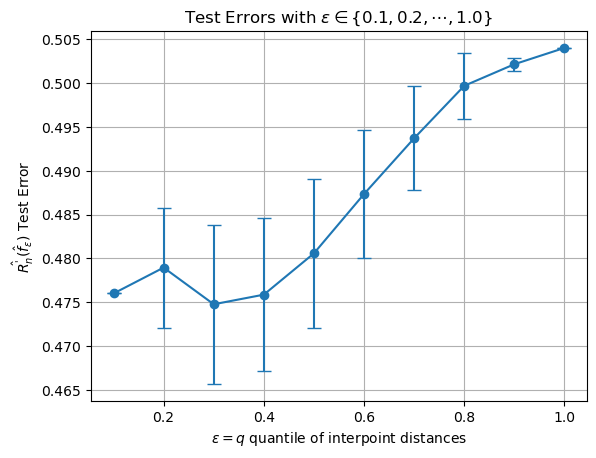

In [246]:
mus = []
stds = []

for q in range(1, 11):
    err = np.array(errors[q])
    mu = err.mean()
    std = err.std()

    mus.append(mu)
    stds.append(std)

x_values = np.arange(1, 11) / 10

plt.errorbar(x_values, mus, yerr=stds, fmt='o-', capsize=5)

# Add labels and title
plt.xlabel("$\epsilon = q$ quantile of interpoint distances")
plt.ylabel("$\hat{R_n^'} (\hat{f}_\epsilon)$ Test Error")
plt.title("Test Errors with $\epsilon \in \{0.1, 0.2, \cdots, 1.0 \}$")

# Show the plot
plt.grid(True)
plt.show()

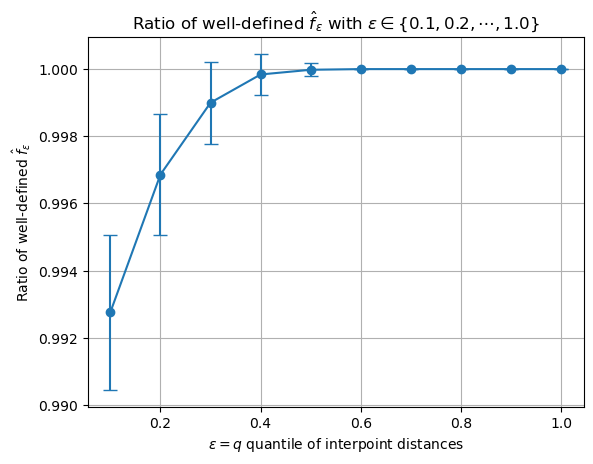

In [275]:
mus = []
stds = []

for q in range(1, 11):
    arr = np.array(well_defined_proportions[q])
    # print(arr)
    mu = arr.mean()
    std = arr.std()

    mus.append(mu)
    stds.append(std)

x_values = np.arange(1, 11) / 10

plt.errorbar(x_values, mus, yerr=stds, fmt='o-', capsize=5)

# Add labels and title
plt.xlabel("$\epsilon = q$ quantile of interpoint distances")
plt.ylabel("Ratio of well-defined $\hat{f}_\epsilon$")
plt.title("Ratio of well-defined $\hat{f}_\epsilon$ with $\epsilon \in \{0.1, 0.2, \cdots, 1.0 \}$")

# Show the plot
plt.grid(True)
plt.show()